#### We first import libraries to work with our csv files

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib

###### Then load all the files in to respective dataframes for ease of identification of missing data

In [4]:
df_1 = pd.read_csv(r"C:\Users\Vince\repos\DataSets\Cab_Data.csv")
df_2 = pd.read_csv(r"C:\Users\Vince\repos\DataSets\City.csv")
df_3 = pd.read_csv(r"C:\Users\Vince\repos\DataSets\Customer_ID.csv")
df_4 = pd.read_csv(r"C:\Users\Vince\repos\DataSets\Transaction_ID.csv")

In [5]:
result = pd.merge(df_1, df_4, how="inner", on="Transaction ID")

In [6]:
result.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


In [7]:
result.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
Customer ID       0
Payment_Mode      0
dtype: int64

In [8]:
result_1 = pd.merge(df_3, result, how="inner", on="Customer ID")

In [9]:
result_1.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Payment_Mode          0
dtype: int64

In [10]:
result_1.head(10)

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Payment_Mode
0,29290,Male,28,10813,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Card
1,29290,Male,28,10813,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Cash
2,29290,Male,28,10813,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Card
3,27703,Male,27,9237,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Card
4,27703,Male,27,9237,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Card
5,27703,Male,27,9237,10324737,43224,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,Cash
6,27703,Male,27,9237,10395626,43400,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,Card
7,28712,Male,53,11242,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,Cash
8,28712,Male,53,11242,10079404,42634,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,Card
9,28712,Male,53,11242,10186994,42909,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,Card


In [11]:
Insight_df = pd.merge(df_2, result_1, how="inner", on="City")

In [12]:
Insight_df.isnull().sum()

City                  0
Population            0
Users                 0
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
Transaction ID        0
Date of Travel        0
Company               0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Payment_Mode          0
dtype: int64

In [13]:
Insight_df.tail()

,City,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Payment_Mode
359387,BOSTON MA,"248,968","80,021",59005,Female,24,13380,10359625,43323,Yellow Cab,33.04,459.13,444.0576,Card
359388,BOSTON MA,"248,968","80,021",59005,Female,24,13380,10408986,43421,Yellow Cab,35.96,559.79,496.2480,Card
359389,BOSTON MA,"248,968","80,021",59032,Female,33,10658,10350423,43303,Pink Cab,39.59,467.02,415.6950,Card
359390,BOSTON MA,"248,968","80,021",58491,Female,27,27302,10353979,43309,Yellow Cab,6.90,78.86,86.1120,Card
359391,BOSTON MA,"248,968","80,021",58491,Female,27,27302,10430065,43454,Yellow Cab,38.76,563.01,483.7248,Card


###### To identify outliers we will use seaborn and use boxplot and interquartile range to have a visual representation of the data.

<AxesSubplot:xlabel='Age'>

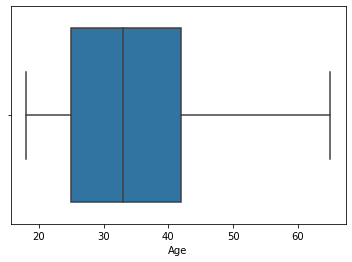

In [18]:
import seaborn as sns
sns.boxplot(x=Insight_df['Age'])

<AxesSubplot:xlabel='Cost of Trip'>

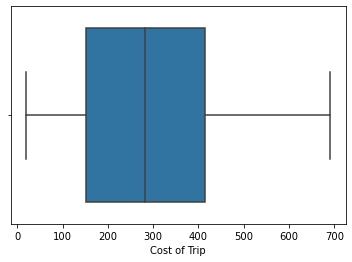

In [19]:
sns.boxplot(x=Insight_df['Cost of Trip'])

In [20]:
from scipy import stats
import numpy as np
Q1 = Insight_df.quantile(0.25)
Q3 = Insight_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Customer ID            33373.0000
Age                       17.0000
Income (USD/Month)     12611.0000
Transaction ID        220127.5000
Date of Travel           535.0000
KM Travelled              20.9600
Price Charged            377.2225
Cost of Trip             262.4832
dtype: float64


In [21]:
Insight_df.to_csv(r'C:\Users\Vince\repos\DataSets\Insight.csv', index = False)

In [22]:
grouped = Insight_df.groupby(Insight_df.Company)

Yellow_Cab = grouped.get_group("Yellow Cab")
Pink_Cab = grouped.get_group("Pink Cab")

In [23]:
Yellow_Cab.head()

,City,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Payment_Mode
1,NEW YORK NY,"8,405,837","302,149",2416,Male,28,21399,10006684,42405,Yellow Cab,34.34,1099.35,482.1336,Cash
2,NEW YORK NY,"8,405,837","302,149",2416,Male,28,21399,10015798,42442,Yellow Cab,19.20,559.30,264.9600,Card
3,NEW YORK NY,"8,405,837","302,149",2416,Male,28,21399,10074689,42621,Yellow Cab,14.84,322.28,179.8608,Card
5,NEW YORK NY,"8,405,837","302,149",2416,Male,28,21399,10111321,42693,Yellow Cab,32.98,981.40,439.2936,Cash
6,NEW YORK NY,"8,405,837","302,149",2416,Male,28,21399,10148638,42785,Yellow Cab,19.04,574.60,255.8976,Card


In [24]:
Pink_Cab.head()

,City,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Payment_Mode
0,NEW YORK NY,"8,405,837","302,149",2416,Male,28,21399,10000139,42377,Pink Cab,17.85,242.90,198.135,Cash
4,NEW YORK NY,"8,405,837","302,149",2416,Male,28,21399,10078883,42631,Pink Cab,37.08,728.27,393.048,Card
22,NEW YORK NY,"8,405,837","302,149",2416,Male,28,21399,10338439,43267,Pink Cab,4.95,53.81,50.985,Cash
30,NEW YORK NY,"8,405,837","302,149",2060,Male,18,8149,10000140,42378,Pink Cab,25.30,407.21,255.530,Card
32,NEW YORK NY,"8,405,837","302,149",2060,Male,18,8149,10016614,42446,Pink Cab,2.28,36.62,23.028,Card
